In [1]:
import networkx as nx

In [7]:
def recursive_local_expand(G, node_set, possible, excluded, results, max_size):
        """
        Recursive function to add an extra node to the subgraph being formed
        """
        results.append(node_set)
        if len(node_set) == max_size:  # Should this be max_size + 1?
            return
        for node in possible - excluded:
            new_node_set = node_set | {node}
            excluded = excluded | {node}
            new_possible = (possible | set(G.neighbors(node))) - excluded
            recursive_local_expand(G, new_node_set, new_possible, excluded, results, max_size)


def get_all_connected_subgraphs(G, min_motif_size, max_motif_size):
    """Get all connected subgraphs by a recursive procedure"""

    # Connected components sorted in decreasing order by number of nodes
    con_comp = [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]  
   
    results = []
    for cc in con_comp:
        max_size = max_motif_size  #len(cc)

        excluded = set()
        for node in G:
            excluded.add(node)
            node_set = {node}
            possible = set(G.neighbors(node)) - excluded
            recursive_local_expand(G, node_set, possible, excluded, results, max_size)

    results.sort(key=len)

    results_no_single_nodes = [motif for motif in results if len(motif) > 1]

    results_nx_objects = [G.subgraph(motif) for motif in results_no_single_nodes]

    return results_no_single_nodes, results_nx_objects

[(0, {'atoms': 'H'}), (2, {'atoms': 'N'}), (1, {'atoms': 'H'}), (3, {'atoms': 'C'})]
[(0, 2, {'bonds': 1}), (2, 1, {'bonds': 1}), (2, 3, {'bonds': 2})]


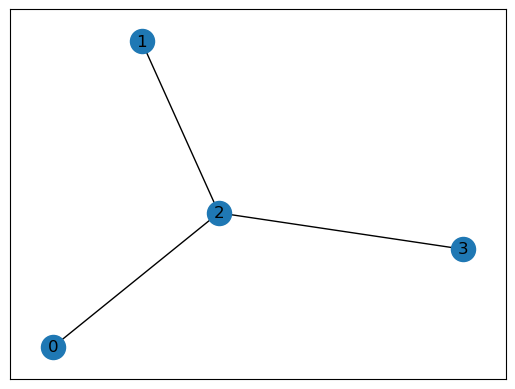

In [8]:
# Toy graph
edgelist = [(0, 2), (1, 2), (2, 3)]
A = nx.Graph(edgelist)

A.nodes[0]['atoms'] = 'H'
A.nodes[1]['atoms'] = 'H'
A.nodes[2]['atoms'] = 'N'
A.nodes[3]['atoms'] = 'C'

A.edges[0, 2]['bonds'] = 1
A.edges[1, 2]['bonds'] = 1
A.edges[2, 3]['bonds'] = 2

print(A.nodes.data())
print(A.edges.data())
nx.draw_networkx(A, with_labels=True)

In [9]:
get_all_connected_subgraphs(A, min_motif_size=2, max_motif_size=3)

([{0, 2}, {1, 2}, {2, 3}, {0, 1, 2}, {0, 2, 3}, {1, 2, 3}],
  <networkx.classes.graph.Graph at 0x7346fab86fc0>])